# Importação das Bibliotecas utilizadas e Declaração do Conjunto de Dados

In [1]:
# Importar Bibliotecas utilizadas
import numpy as np 
import pandas as pd
import statistics
import matplotlib.pyplot as plt
import seaborn as sns

# Conjuntos de dados
conjunto_de_dados_1 = np.array([7,3,2,7,1]) 
conjunto_de_dados_2 = np.array([4,4,4,4,4]) 
conjunto_de_dados_3 = np.array([8,8,1,1,2]) 
conjunto_de_dados_4 = np.array([6,4,4,2,4]) 

# Lista com os Conjuntos de Dados
conjuntos = [conjunto_de_dados_1,conjunto_de_dados_2,conjunto_de_dados_3,conjunto_de_dados_4]

# Construção de Funções que auxiliam nos cálculos necessários 

In [2]:
# Função que calcula a Amplitude (Range)
def amplitude(conjunto_de_dados):
    amplitude = np.max(conjunto_de_dados) - np.min(conjunto_de_dados)
    return amplitude

In [3]:
# Função que gera gráficos de dispersão (scatterplots)
def graficos_dispersao(conjuntos):
    
    fig, ax = plt.subplots(2,2, figsize=(12,10),sharey=True)
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=10)
            ax[j][i] = sns.scatterplot(data=conjuntos[indice], ax=ax[j][i])
            title = 'Conjunto de Dados ' + str(indice+1)
            ax[j][i].set_title(title)
            indice += 1
    fig.suptitle('Gráficos de Dispersão', position=(.5,1), fontsize=20)
    fig.tight_layout()

    return

In [4]:
# Função que calcula a variância populacional
def variancia_populacional(conjunto_de_dados):
    
    # Cálculo da média do conjunto de dados
    media = conjunto_de_dados.mean()
    
    # Elevando ao quadrado o valor absoluto da diferença de cada valor do dado do conjunto pela média  
    # e dividindo pelo número de observações
    abs_diff = np.abs(conjunto_de_dados - media)**2/np.size(conjunto_de_dados)
    
    # Somando abs_diff
    var = sum(abs_diff)
    
    return var

In [5]:
# Função que calcula a variância amostral
def variancia_amostral(conjunto_de_dados):
    
    # Cálculo da média do conjunto de dados
    media = conjunto_de_dados.mean()
    
    # Elevando ao quadrado o valor absoluto da diferença de cada valor do dado do conjunto pela média  
    # e dividindo pelo número de observações menos 1
    abs_diff = np.abs(conjunto_de_dados - media)**2/(np.size(conjunto_de_dados)-1)
    
    # Somando abs_diff
    var = sum(abs_diff)
    
    return var

In [6]:
# Função que calcula o desvio padrão populacional
def desvio_padrao_populacional(conjunto_de_dados):
    
    # Cálculo da média do conjunto de dados
    media = conjunto_de_dados.mean()
    
    # Elevando ao quadrado o valor absoluto da diferença de cada valor do dado do conjunto pela média  
    # e dividindo pelo número de observações
    abs_diff = np.abs(conjunto_de_dados - media)**2/np.size(conjunto_de_dados)
    
    # Somando abs_diff
    var = sum(abs_diff)
    
    # Extraindo a raiz quadrada da variância
    dp = np.sqrt(var)
    
    return dp

In [7]:
# Função que calcula o desvio padrão amostral
def desvio_padrao_amostral(conjunto_de_dados):
    
    # Cálculo da média do conjunto de dados
    media = conjunto_de_dados.mean()
    
    # Elevando ao quadrado o valor absoluto da diferença de cada valor do dado do conjunto pela média  
    # e dividindo pelo número de observações menos 1
    abs_diff = np.abs(conjunto_de_dados - media)**2/(np.size(conjunto_de_dados)-1)
    
    # abs_diff
    var = sum(abs_diff)
    
    # Extraindo a raiz quadrada da variância
    dp = np.sqrt(var)
    
    return dp

In [8]:
# Função que calcula o 1º, 2º e 3º quartil
def quartil(conjunto_de_dados):

    Q1 = np.quantile(conjunto_de_dados,0.25)
    
    Q2 = np.quantile(conjunto_de_dados,0.50)

    Q3 = np.quantile(conjunto_de_dados,0.75)
    
    return Q1, Q2, Q3

In [9]:
# Função que plota o boxplot
def boxplot(conjuntos):
    
    fig, ax = plt.subplots(2,2, figsize=(12,10),sharey=False)
    indice = 0
    for j in range(len(ax)):
        for i in range(len(ax[j])):
            ax[j][i].tick_params(labelsize=10)
            ax[j][i] = sns.boxplot(data=conjuntos[indice], ax=ax[j][i])
            title = 'Conjunto de Dados ' + str(indice+1)
            ax[j][i].set_title(title)
            indice += 1
    fig.suptitle('Boxplots', position=(.5,1), fontsize=20)
    fig.tight_layout()
    
    return

In [10]:
# Função que calcula outliers segundo o critério de John Tukey
def outliers(conjunto_de_dados):
    
    Q1, Q2, Q3 = quartil(conjunto_de_dados)
    
    # Cálculo do intervalo interquartil
    IQR = Q3 - Q1 
    
    # Cálculo da quantidade de outliers acima do limite superior (outlier_superior > Q3 + 1,5*IQR)
    limite_superior = Q3 + 1.5*IQR

    # Cálculo da quantidade de outliers acima do limite inferior (outlier_inferior > Q1 - 1,5*IQR)
    limite_inferior = Q1 - 1.5*IQR
    
    # Contagem da quantidade de termos acima do limite superior ou abaixo do limite inferior
    outlier = sum(conjunto_de_dados > limite_superior) + sum(conjunto_de_dados < limite_inferior)
    
    return outlier

In [11]:
# Transformação para DataFrame
def array_to_dataframe(conjunto_de_dados_array):
    
    conjunto_de_dados_dataframe = pd.DataFrame(conjunto_de_dados_array,columns=['Medidas'])
    
    return conjunto_de_dados_dataframe

# Visualização Gráfica - Scatterplot e Boxplot

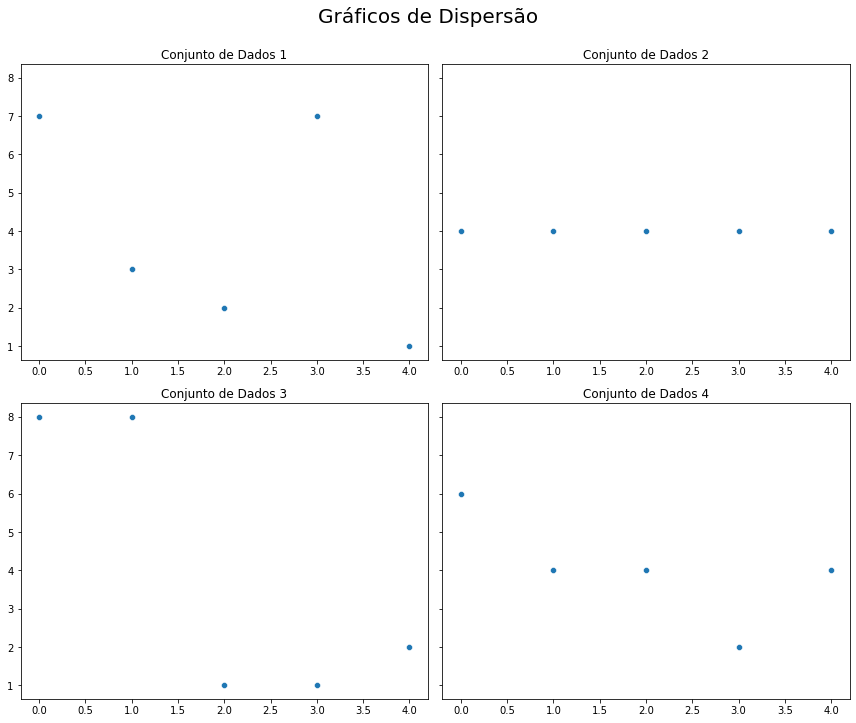

In [12]:
# Plotagem dos Gráficos de Dispersão
graficos_dispersao(conjuntos)

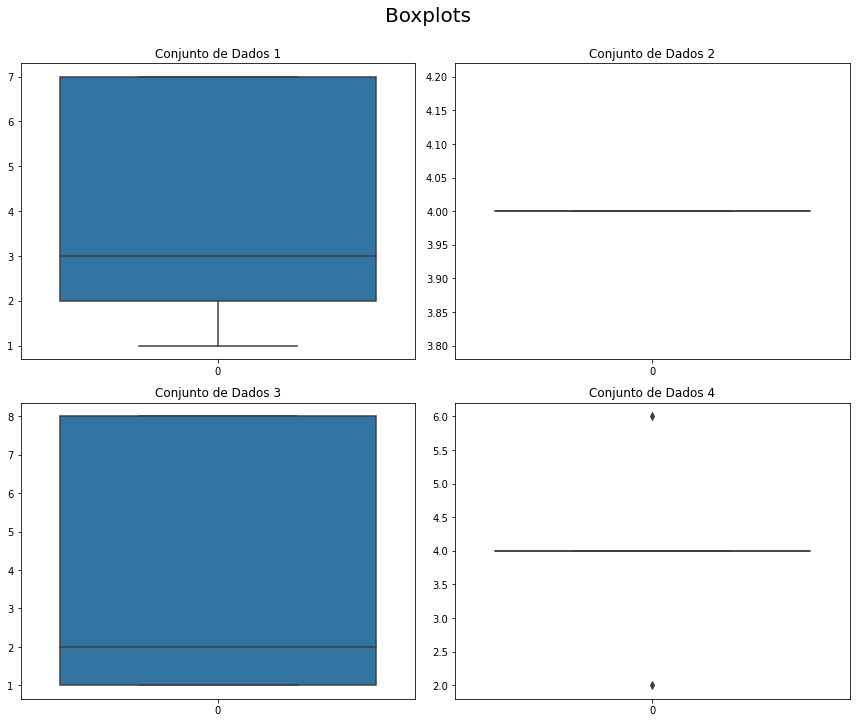

In [13]:
# Plotagem dos Gráficos de Boxplot
boxplot(conjuntos)

# Resultados 

In [14]:
print('--------------------------------------------------')
indice = 1
for conjunto in conjuntos:
    
    conjunto_de_dados = array_to_dataframe(conjunto)
    amp               = amplitude(conjunto)
    var_pop           = variancia_populacional(conjunto)
    var_amostral      = variancia_amostral(conjunto)
    dp_pop            = desvio_padrao_populacional(conjunto)
    dp_amostral       = desvio_padrao_amostral(conjunto)
    Q1,Q2,Q3          = quartil(conjunto)
    outlier           = outliers(conjunto)
    print('Conjunto de Dados',indice,'\n')
    print('Amplitude:',amp,'\n')
    print('Variância Populacional:',var_pop,'\n')
    print('Variância Amostral:',var_amostral,'\n')
    print('Desvio Padrão Populacional:',dp_pop,'\n')
    print('Desvio Padrão Amostral:',dp_amostral,'\n')
    print('Primeiro Quartil:',Q1,'|','Segundo Quartil:',Q2,'|','Terceiro Quartil:',Q3,'\n')
    print('Quantidade de Outliers:',outlier,'\n')
    print('Resultados utilizando Describe \n',conjunto_de_dados.describe(),'\n')
    print('--------------------------------------------------')
    indice += 1

--------------------------------------------------
Conjunto de Dados 1 

Amplitude: 6 

Variância Populacional: 6.3999999999999995 

Variância Amostral: 8.0 

Desvio Padrão Populacional: 2.5298221281347035 

Desvio Padrão Amostral: 2.8284271247461903 

Primeiro Quartil: 2.0 | Segundo Quartil: 3.0 | Terceiro Quartil: 7.0 

Quantidade de Outliers: 0 

Resultados utilizando Describe 
         Medidas
count  5.000000
mean   4.000000
std    2.828427
min    1.000000
25%    2.000000
50%    3.000000
75%    7.000000
max    7.000000 

--------------------------------------------------
Conjunto de Dados 2 

Amplitude: 0 

Variância Populacional: 0.0 

Variância Amostral: 0.0 

Desvio Padrão Populacional: 0.0 

Desvio Padrão Amostral: 0.0 

Primeiro Quartil: 4.0 | Segundo Quartil: 4.0 | Terceiro Quartil: 4.0 

Quantidade de Outliers: 0 

Resultados utilizando Describe 
        Medidas
count      5.0
mean       4.0
std        0.0
min        4.0
25%        4.0
50%        4.0
75%        4.0
max      

Notamos que o desvio padrão calculado pelo método describe é o desvio padrão amostral.